## PROJECT TEAM ID: "PTID-CDS-FEB-24-1824"

## PROJECT ID : PRCP-1021-InsCostPred

### Problem Statement 

* Task 1:- Prepare a complete data analysis report on the given data.
* Task 2:-
  Prepare the data, identifying and extracting key features (both input and output
  parameters) relevant to the problem you will solve.
  Build and train a machine learning model. Here you can evaluate different
  algorithms, settings and see which model is best for your scenario.
* Task 3:- Create a machine learning model to predict the insurance price charged to the
  customer. The charge depends on various features such as age, type of coverage,
  amount of coverage needed, gender, body mass index (BMI), region, and other special
  factors like smoking to determine what health risks the person possesses.

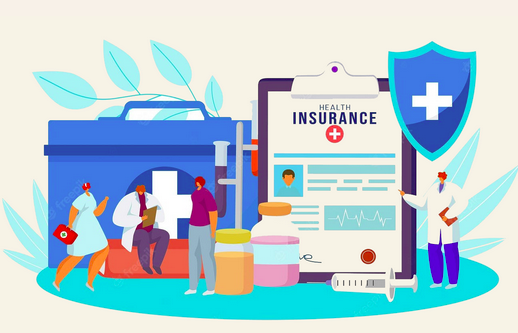

### PROJECT PIPELINE

1. Data Preprocessing 

* Load the datatset and inspect the first few rows.
* Check for missing values and decide on a stratergy to handle them.
* Look for any categorical variables and plan for encoding.
* Normalize or standardize numerical features if necessary.

2. Exploratory Data Analysis(EDA)

* Generate summary statistics to understand the data distribution.
* Create visualizations to uncover patterns and relationship.
* Identify any outliers or anomalies in the dataset.

3. Feature Engineering 

* Create new features that might improve model performance.
* Transform features if necessary(e.g.,log transformation).

4. Feature Engineering 

* Use statistical techniques to select a subset of relevant features.
* Employ methods like correlation analysis or feature importance from esemble methods.
 
5. Model Training and Evaluation

* Split the data into training and test sets.
* Train different models: Linear Regression, SVM, Random Forest.
* Evaluate each model using appropriate metrics.
* Perform hyperparameter tuning if necessary.

6. Prediction

* Choose the best - performing model based on evaluation metrics.
* Make Prediction on the test set.
* Interpret the result and provide insights.

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## DOMAIN ANALYSIS

* age:- age of primary beneficiary 

* sex:- insurance contractor gender, female, male 

* bmi:- Body mass index, providing an understanding of
  body, weights that are relatively high or low relative to   height,
  objective index of body weight (kg / m ^ 2) using the
  ratio of height to weight, ideally 18.5 to 24.9.
  
* children:- Number of children covered by health insurance   / Number of dependents

* smoker:- Smoking

* region:- the beneficiary's residential area in the US,
  northeast, southeast, southwest, northwest.
  
* charges:- Individual medical costs billed by health 
  insurance


## Data Collection

In [3]:
# import Data
data = pd.read_csv("datasets_13720_18513_insurance(1).csv")
pd.set_option("display.max_rows",None)

## Basic checks 

In [4]:
a = data.copy()

In [5]:
data.head() # TOP 5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail() # LAST 5

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape # Number of rows 1338 and column 7

(1338, 7)

In [8]:
data.columns # All Columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
data.info() # NO NULL VALUE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.describe() # Statistical Summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.describe().T #Change row and coumns position

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
print(data.nunique().sort_values(ascending=False))

charges     1337
bmi          548
age           47
children       6
region         4
sex            2
smoker         2
dtype: int64


In [13]:
data.dtypes # Types of data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
data.isnull().sum() # check Missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploratory Data Analysis

- Using EDA :- Visualize features, insights/observation from the data

In [15]:
data_con=data[['age','bmi']]
data_cat=data[['sex','children','smoker','region']]

### Univariate Analysis

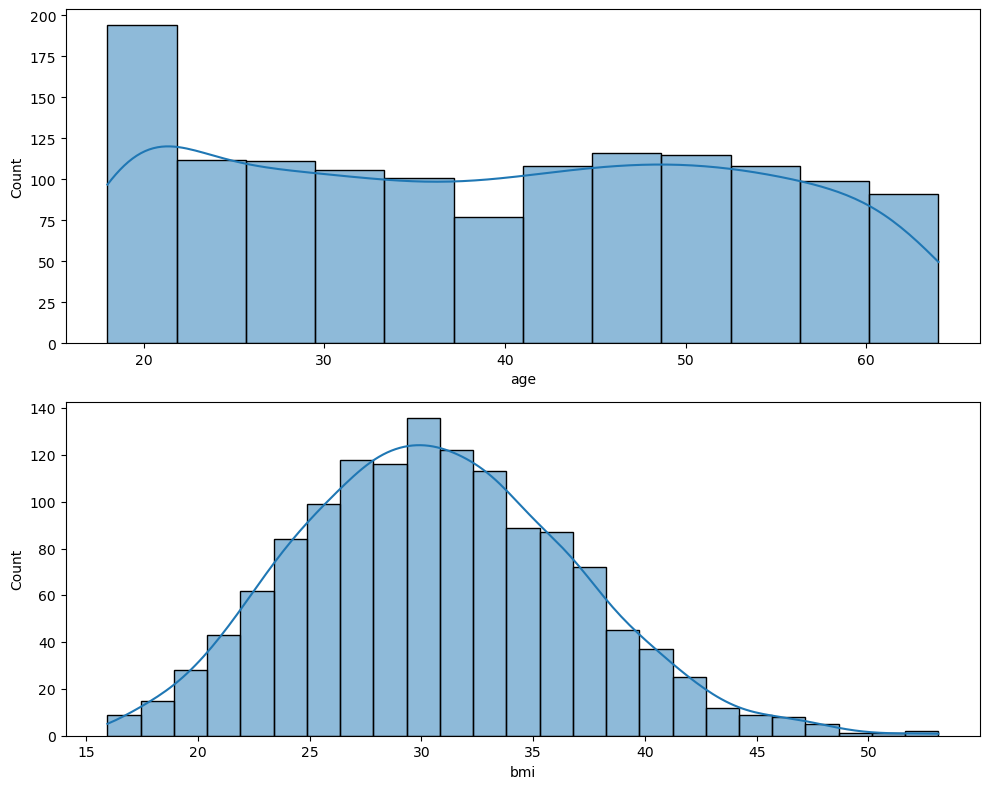

In [19]:
plt.figure(figsize =(10,8))
plot = 1
for i in data_con:
    plt.subplot(2,1,plot)
    sns.histplot(x =data_con[i],kde = True)
    plot+=1
plt.tight_layout()

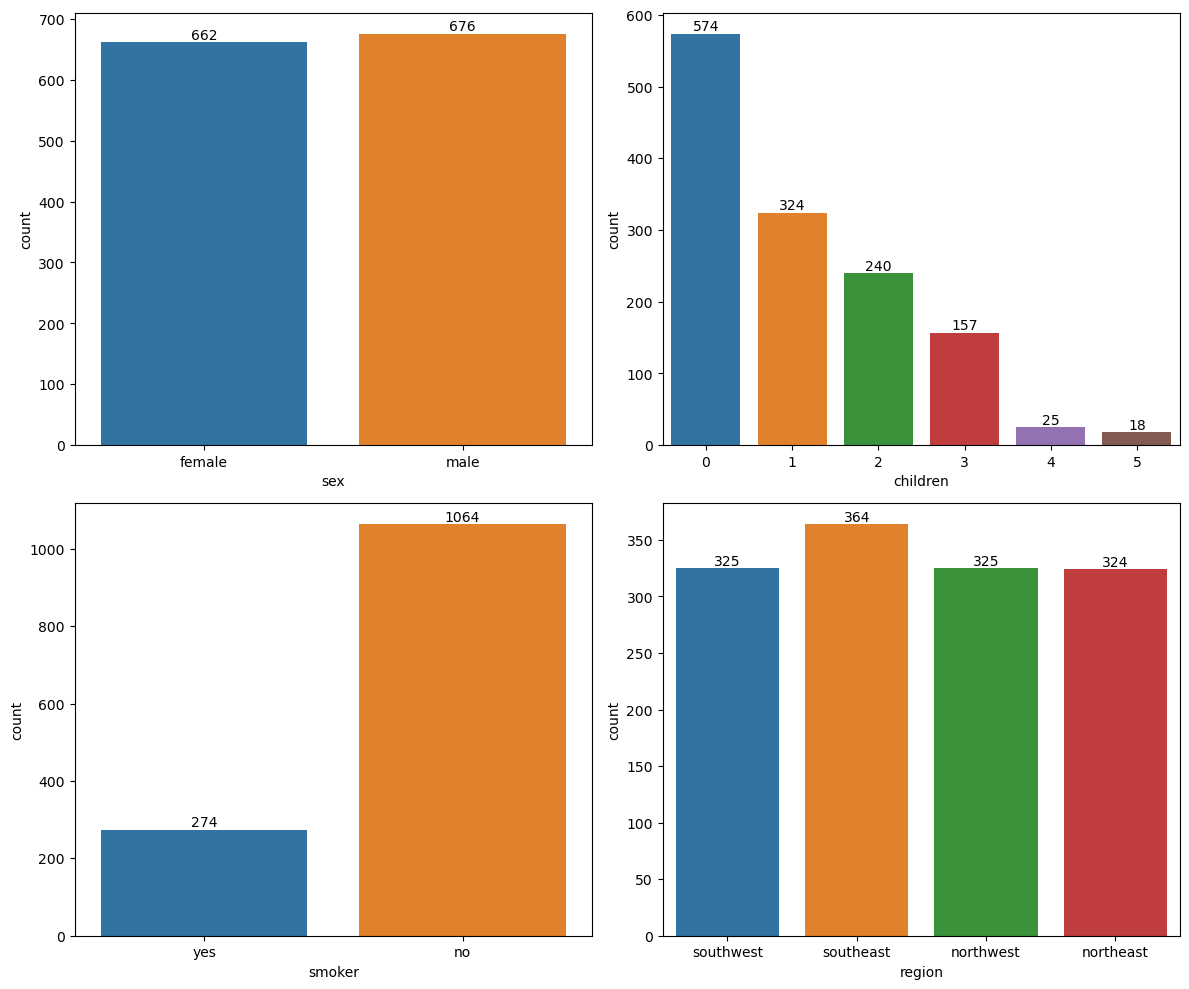

In [20]:
plt.figure(figsize =(12,10))
plot = 1
for i in data_cat:
    plt.subplot(2,2,plot)
    ax =sns.countplot(x =data_cat[i])
    plot+=1
    for i in ax.containers:
        ax.bar_label(i)
plt.tight_layout()

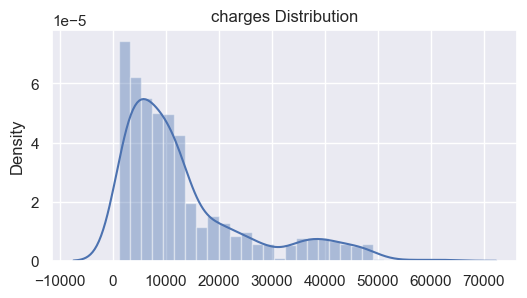

In [21]:
# Distribution of BMI values
sns.set()
plt.figure(figsize=(6,3))
sns.distplot(x=data['charges'])
plt.title('charges Distribution')
plt.show()

## Insights

* Age - we have maximum density most number of values in this 20,21,22 range
* Sex - it is almost equal,so the distribution is almost equal for both gender
* bmi - its represent body mass index whether a person is overweight and underweight or in a normal weight , this kind of distribution data as a normal distribution, normal bmi range --> 18.5 to 24.9
* Children - here more number of people who doesn't have any children
* Smoker - number of non-smoker is kind of more in this dataset about more than thousand
* region - in region data is almost similar for all the different type of values little kind of more for the southeast
* charges - we have lot of data distributed in this ten thousand values so ten thousand dollers



In [22]:
data1=data[['age','bmi','children','charges']]


### Bivariate Analysis

<Axes: xlabel='age', ylabel='charges'>

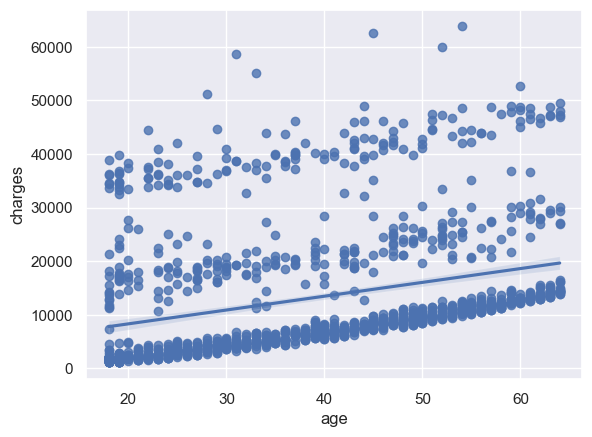

In [23]:
sns.regplot(x =data['age'],y =data['charges'])

insights:
- with increase in age we see that insurance charges are also getting increased

<Axes: xlabel='bmi', ylabel='charges'>

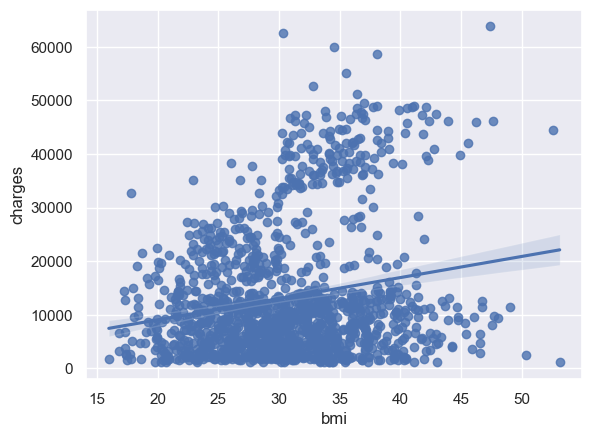

In [24]:
sns.regplot(x =data['bmi'],y =data['charges'])

insights:

positive corelation of BMI with charges

<Axes: xlabel='children', ylabel='charges'>

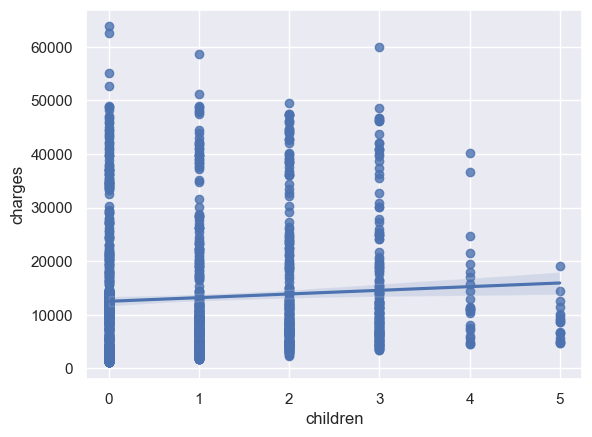

In [25]:
sns.regplot(x =data['children'],y =data['charges'])

insights :

* there is a positive corelation with charges based on number of children

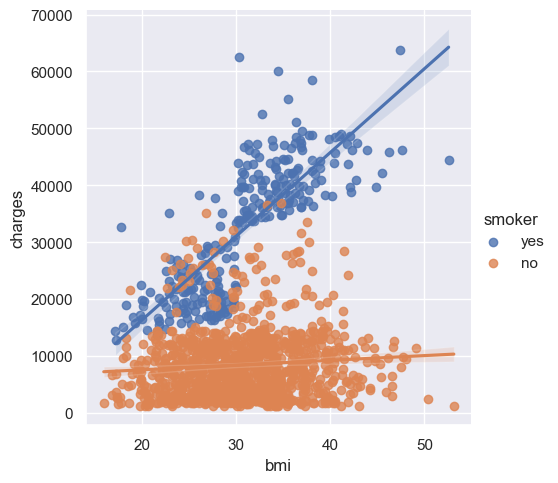

In [26]:
sns.lmplot(x ='bmi',y ='charges',hue ='smoker',data = data)

insights :

* smoking individual are paying more insurance price with respect to BMI
* non-smokers individual are paying less than smokers with respect to BMI

### Heatmap

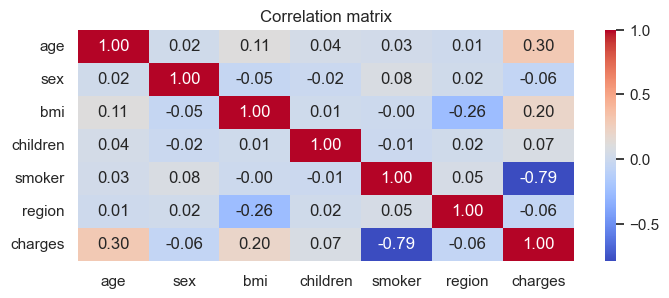

In [28]:
# Create a correlation heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [29]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


### Data Pre-processing 

* Data preprocessing- is the process of cleaning and preparing the raw data to enable feature
  engineering.
* Feature Engineering covers various data engineering techniques such as adding/removing
  relevant features, handling missing data, encoding the data, handling categorical variables,
  etc
* handling missing values
* handling outliers
* drop duplicates
* handling categorical varaibles

In [27]:
# categorical to numerical
#encoding Smoker,sex , region 
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [26]:
# Sum of missing values 
data.isnull().sum().sort_values(ascending=False) # Data is Clean

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No missing data

### Check Outliers 

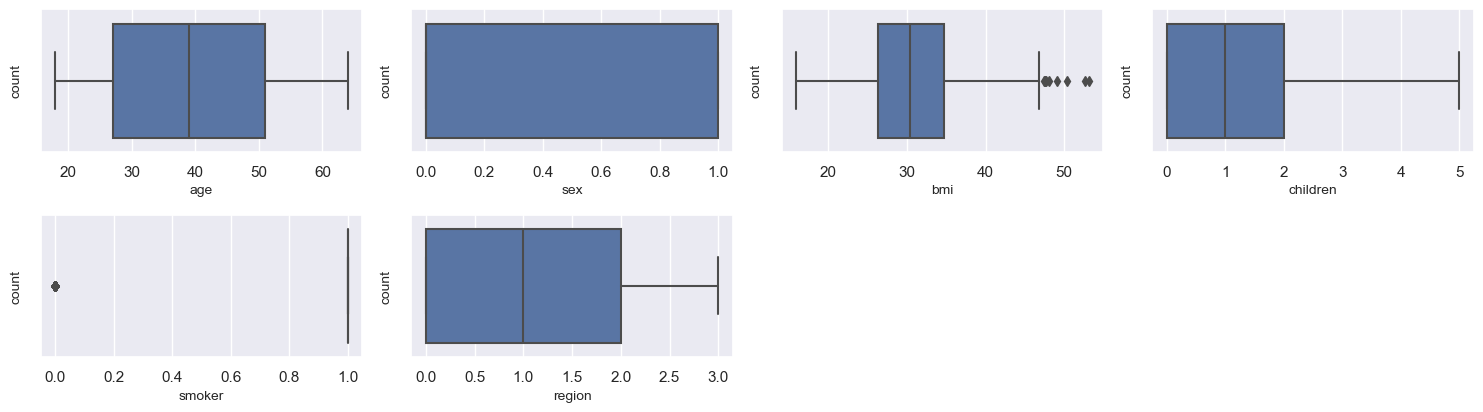

In [30]:
plt.figure(figsize=(15,10),facecolor="White")
plotnumber=1
for column in data.drop("charges",axis=1):
    if plotnumber<21:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
        plotnumber+=1
    plt.tight_layout()

### Outlier remove 
* bmi-
  Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [31]:
data.loc[data['bmi'] > 45,'bmi'] = np.mean(data.bmi)

<Axes: xlabel='bmi'>

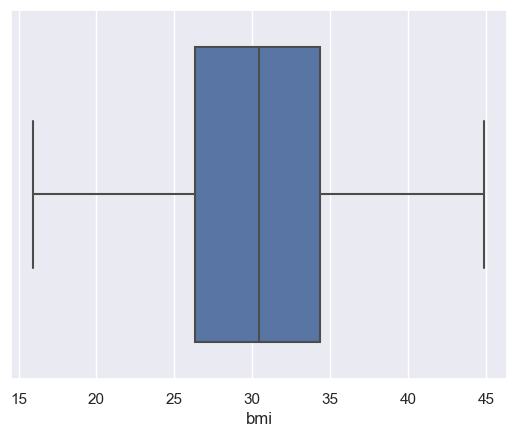

In [32]:
sns.boxplot(x=data['bmi'])

### Model Creation 

* Model prediction is the process of using a trained predictive model to estimate the output variable for a new or unseen input variable Model prediction is useful for making decisions, evaluating scenarios, and forecasting future events

In [33]:
X=data.drop("charges",axis=1) #Independent Feature
y=data.charges #dependent feature

In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [35]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
# Splitting the data into Training data & Testing data

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
# checking the shapes of the spitted data
print('x_train:',X_train.shape)
print('x_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1070, 6)
x_test: (268, 6)
y_train: (1070,)
y_test: (268,)


## Linear regression

In [39]:
# Multiple linear regression
#for training data
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Evaluate the model

In [40]:
# Performance Evaluation training data

y_pred=model.predict(X_train)
print("R2_score",r2_score(y_train,y_pred))

R2_score 0.7426291938477128


In [41]:
# Multiple linear regression
#for testing data
y_pred=model.predict(X_test)

In [42]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred))
print("R2_score",r2_score(y_test,y_pred))

MAE 4213.7580561776695
MAPE 0.48351947118491684
R2_score 0.7756238690070242


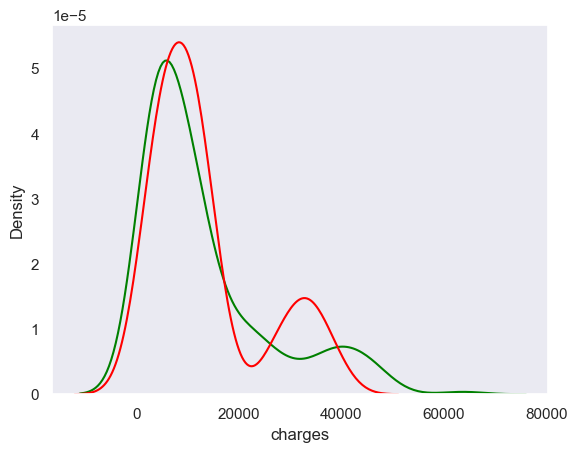

In [43]:
# Performance Visualize
sns.kdeplot(y_test,color='green')
sns.kdeplot(y_pred,color='red')
plt.grid()

In [42]:
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160


## build model for cost of insurance

In [44]:
df = ([[31,1,25.74,0,1,0]])
new_df=np.asanyarray(df)
new_pred=model.predict(new_df)
print('cost of insurance',new_pred)

cost of insurance [4013.69998404]


### Random Forest Regression

In [45]:
# Random Forest regression
model1 = RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=3,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    max_samples=None,
)
model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=4)

### Evaluate the models

In [46]:
# For training data
y_pred1=model1.predict(X_train)
print("R2_score",r2_score(y_train,y_pred1))

R2_score 0.9250460572581823


In [47]:
#for testing data
y_pred1=model1.predict(X_test)
print("R2_score",r2_score(y_test,y_pred1))

R2_score 0.8731677988628531


### GradientBoosting Regression

In [48]:
# GradientBoost regression
#for training data
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)

GradientBoostingRegressor()

### Evaluate the models

In [49]:
y_pred3=model3.predict(X_train)
print("R2_score",r2_score(y_train,y_pred3))

R2_score 0.8976639416570499


In [51]:
#for testing data
y_pred3=model3.predict(X_test)

In [52]:
print("MAE",mean_absolute_error(y_test,y_pred3))
print("MAPE",mean_absolute_percentage_error(y_test,y_pred3))
print("R2_score",r2_score(y_test,y_pred3))

MAE 2451.162704145972
MAPE 0.28228115493224915
R2_score 0.8750299368875446


### XGBoost Regression

In [53]:
model4=XGBRegressor()
model4.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluate the model

In [54]:
y_pred_train=model4.predict(X_train)
y_pred_test=model4.predict(X_test)
print("r2_square for train:",r2_score(y_train,y_pred_train))
print("r2_square for test:",r2_score(y_test,y_pred_test))

r2_square for train: 0.9945488880308881
r2_square for test: 0.8370005792228344


### Methods for Avoiding Underfitting

* 1.Hyperparameter Tuning
* 2.Cross-Validation

### Hyperparameter Tuning

* Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters, which are settings that control the learning process of the model. This can help reduce Overrfitting by finding the best combination of hyperparameters that allow the model to learn from the data effectively and efficiently.

### Random Forest Regression

In [55]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 98}


In [56]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=98,
    criterion='squared_error',
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=3,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    max_samples=None,
)
rfmodel.fit(X_train,y_train)
y_predtrain2=rfmodel.predict(X_train)
y_predtest2=rfmodel.predict(X_test)
print(r2_score(y_train,y_predtrain2))
print(r2_score(y_test,y_predtest2))

0.924000564753537
0.8698307517088051


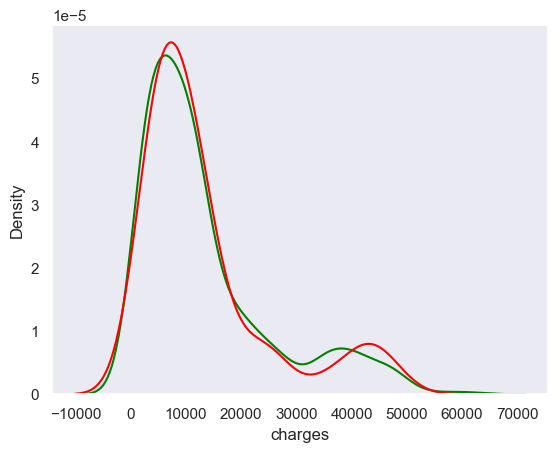

In [57]:
# visualize the training data
sns.kdeplot(y_train,color='green')
sns.kdeplot(y_predtest2,color='red')
plt.grid()

### GradientBoostingRegression

In [58]:
# Hyperparameter Tuning 
# GridSearchCV
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.21, 'n_estimators': 19}


In [59]:
model__=GradientBoostingRegressor(n_estimators=19,learning_rate=0.21)
model__.fit(X_train,y_train)
y_predtrain1=model__.predict(X_train)
y_predtest1=model__.predict(X_test)
print("r2_square for train:",r2_score(y_train,y_predtrain1))
print("r2_square for test:",r2_score(y_test,y_predtest1))

r2_square for train: 0.8776637689291525
r2_square for test: 0.8757367437319762


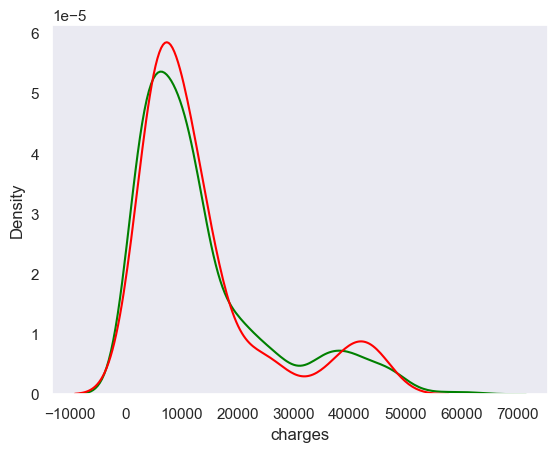

In [60]:
#visulazing the test data
sns.kdeplot(y_train,color='green')
sns.kdeplot(y_predtest1,color='red')
plt.grid()

### XGBoost Regression

In [61]:
estimator=XGBRegressor()
param_grid={'n_estimator':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimator': 10}


In [62]:
model5=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
model5.fit(X_train,y_train)
y_pred_train1=model5.predict(X_train)
y_pred_test1=model5.predict(X_test)
print("r2_square for train:",r2_score(y_train,y_pred_train1))
print("r2_square for test:",r2_score(y_test,y_pred_test1))

r2_square for train: 0.8705877894534073
r2_square for test: 0.8787562500534468


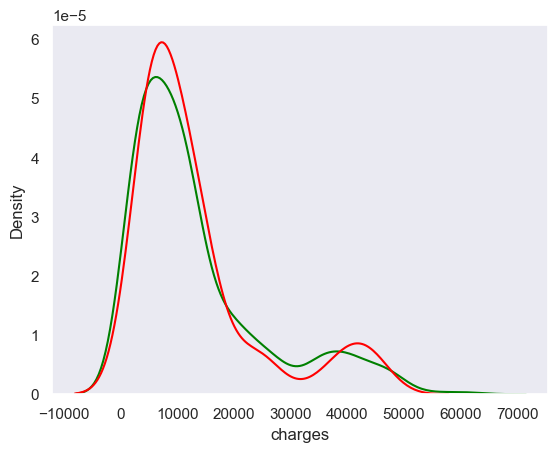

In [63]:
#visulazing the test data
sns.kdeplot(y_train,color='green')
sns.kdeplot(y_pred_test1,color='red')
plt.grid()

### Insights
* linear Regression - Test Accuracy- 78% Training accuracy 74% ----> perfect Model but low accuracy
* support vector machine -  inperfect and low accuracy
* Random Forest -Test Accuracy- 89% Training accuracy 92% ----> overfit model but we will improve little bit using hyperparameter tuning.
* Gradient Boosting - Test Accuracy - 87% and Training Accuracy 87% ----> perfect model with Accuracy
* XG Boost Regression - Test Accuracy - 88% and Training Accuracy 87% ----> perfect model with Accuracy
* What is overfitting?
* When we have high traning accuracy and low testing accuracy we can say this model is konw as Overfitting model

## Cross_Validation

* Cross-validation is a technique for validating the performance of a model on unseen data. It involves dividing the data into multiple folds or subsets, using one of them as a validation set, and training the model on the rest.

### Linear  Regression

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(X_train,y_train)
Scores=(cross_val_score(lr,X,y,cv=10)).mean()
print("Cross validation score",Scores)

Cross validation score 0.7443791069385062


### Support Vector Machine

In [65]:
svr=SVR()
svr.fit(X_train,y_train)
Scores=(cross_val_score(svr,X,y,cv=5)).mean()
print("Cross validation score",Scores)

Cross validation score -0.10357587149504002


### Random Forest Regression

In [66]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
Scores=(cross_val_score(rf,X,y,cv=10)).mean()
print("Cross validation score",Scores)

Cross validation score 0.8326684414515201


### Gradient Boosting Regression

In [67]:
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)
Scores=(cross_val_score(GB,X,y,cv=10)).mean()
print("Cross validation score",Scores)

Cross validation score 0.8526495728164585


### XGBoosting Regression

In [68]:
XG =XGBRegressor()
XG.fit(X_train,y_train)
Scores=(cross_val_score(XG,X,y,cv=10)).mean()
print("Cross validation score",Scores)

Cross validation score 0.8120799634893642


### Insights
* Linear Regression - (Mean Score -74% ))
* Random Forest - (Mean Score -84% )
* Gradient Boosting - (Mean Score -85% )
* XGBRegression - (Mean Score -80% )

## Challenges

  1) Understandard Statistical insight
  2) The biggest problem i faced was Overfitting because i was not getting good accuracy.
* I used the following technique
  1) Cross-Validation : By using this method we can improved the accuracy to a small extent. however accuracy was not incresing   in some cases again i used diffrent technique.
  2) Hyperparameter Tuning : By using this technique we can improve the accuracy as we want.good accuracy got in this technique.

## Final Conclusion

* All over project we used so many technique For Example- find relation between various feature ,remove outlier,check missing   value,Perform EDA,find best feature using Cross-validation,hyperparameter tuning and train_test_split model evaluation etc.. 
* We got good accuracy with two model 1) GradientBoosting 2)XGBoosting Regression.
* XGBoost have 88% Accuracy so this is best model for production
* like that we soveld Health Insurance Cost Prediction problem